import required libraries

In [2]:
import tensorflow as tf 
from tensorflow.keras import datasets, layers, models 
import matplotlib.pyplot as plt 
import numpy as np 

In [3]:
(X_train, y_train), (X_test, y_test) = datasets.cifar10.load_data()
X_train.shape

(50000, 32, 32, 3)

In [4]:
X_test.shape

(10000, 32, 32, 3)

In [13]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [14]:
y_train = y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [10]:
classes = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]

In [17]:
def plot_sample(X,y , index): 
    plt.figure(figsize=(15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

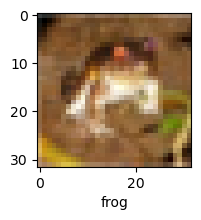

In [18]:
plot_sample(X_train, y_train, 0)

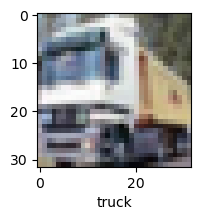

In [19]:
plot_sample(X_train, y_train, 1)

In [20]:
X_train = X_train / 255 
X_test = X_test / 255 

In [21]:
Ann_Model = models.Sequential([
    layers.Flatten(input_shape=(32,32,3)),  
    layers.Dense(3000, activation='relu'),  
    layers.Dense(1000, activation='relu'),  
    layers.Dense(10, activation='sigmoid')
])

Ann_Model.compile(optimizer='SGD',  
                 loss = "sparse_categorical_crossentropy",  
                 metrics=['accuracy'])

C:\Users\HiDeve\anaconda3\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [22]:
Ann_Model.fit(X_train, y_train, epochs=5)

Epoch 1/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 115s 73ms/step - accuracy: 0.3537 - loss: 1.8101
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 119s 76ms/step - accuracy: 0.4242 - loss: 1.6255
Epoch 3/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 143s 77ms/step - accuracy: 0.4565 - loss: 1.5431
Epoch 4/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 138s 75ms/step - accuracy: 0.4777 - loss: 1.4835
Epoch 5/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 143s 75ms/step - accuracy: 0.4956 - loss: 1.4319


In [24]:
from sklearn.metrics import confusion_matrix, classification_report 

y_pred = Ann_Model.predict(X_test) 
y_pred_classes = [np.argmax(element) for element in y_pred]  

print("Classification Report : \n", classification_report(y_test, y_pred_classes))

313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 18ms/step
Classification Report : 
               precision    recall  f1-score   support

           0       0.46      0.55      0.50      1000
           1       0.64      0.44      0.52      1000
           2       0.45      0.24      0.31      1000
           3       0.32      0.46      0.37      1000
           4       0.49      0.33      0.39      1000
           5       0.48      0.23      0.31      1000
           6       0.55      0.48      0.52      1000
           7       0.59      0.48      0.53      1000
           8       0.42      0.79      0.55      1000
           9       0.43      0.62      0.51      1000

    accuracy                           0.46     10000
   macro avg       0.48      0.46      0.45     10000
weighted avg       0.48      0.46      0.45     10000



In [28]:
Cnn_Model = models.Sequential([

    # Cnn 
    layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(32,32,3)),  
    layers.MaxPool2D((2,2)),  

    layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),  
    layers.MaxPooling2D((2,2)),  
    
    # Dense  
    layers.Flatten() ,
    layers.Dense(64, activation='relu'),  
    layers.Dense(10, activation='softmax')
])

C:\Users\HiDeve\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [33]:
Cnn_Model.compile(optimizer='adam',          
                 loss = 'sparse_categorical_crossentropy',      
                 metrics = ['accuracy'])

In [34]:
Cnn_Model.fit(X_train, y_train, epochs=10)

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 48s 28ms/step - accuracy: 0.4768 - loss: 1.4619
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 43s 28ms/step - accuracy: 0.6124 - loss: 1.1076
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 43s 28ms/step - accuracy: 0.6607 - loss: 0.9754
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 82s 28ms/step - accuracy: 0.6899 - loss: 0.8932
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 82s 28ms/step - accuracy: 0.7135 - loss: 0.8247
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 82s 28ms/step - accuracy: 0.7335 - loss: 0.7641
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 82s 28ms/step - accuracy: 0.7539 - loss: 0.7082
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 82s 28ms/step - accuracy: 0.7697 - loss: 0.6582
Epoch 9/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 84s 29ms/step - accuracy: 0.7846 - loss: 0.6154
Epoch 10/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 46s 30ms/step - accuracy: 0.8005 - loss: 0.5709


In [35]:
Cnn_Model.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.6967 - loss: 0.9573


[0.9573400616645813, 0.6966999769210815]

In [36]:
y_test = y_test.reshape(-1, )

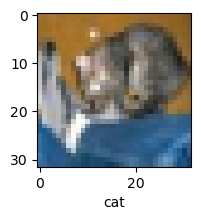

In [37]:
plot_sample(X_test,y_test, 0)

In [38]:
y_pred = Cnn_Model.predict(X_test) 
y_pred[:5]

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step


array([[3.74205806e-03, 2.01720119e-04, 2.31214144e-04, 6.36773467e-01,
        3.59993537e-05, 3.47066373e-02, 8.89301579e-03, 1.69632312e-05,
        3.15380126e-01, 1.88760150e-05],
       [1.04334950e-02, 4.58724238e-03, 2.81463457e-08, 9.64838254e-09,
        8.28640445e-09, 4.03601264e-10, 2.29515504e-10, 2.48694555e-11,
        9.84951556e-01, 2.76561859e-05],
       [2.05327440e-02, 1.44096157e-02, 2.63918046e-04, 1.17212755e-03,
        9.73915885e-05, 2.36548767e-05, 1.10507644e-04, 8.04637530e-05,
        9.59601820e-01, 3.70788621e-03],
       [9.15337741e-01, 1.11357765e-02, 7.30351498e-03, 5.88000075e-05,
        1.63914170e-04, 1.17596865e-05, 1.80228981e-05, 2.14372335e-06,
        6.56453669e-02, 3.22954700e-04],
       [4.28431122e-08, 1.82985568e-05, 3.46152373e-02, 3.06089479e-03,
        3.91155958e-01, 4.58266266e-04, 5.70673704e-01, 1.76151218e-06,
        1.58717485e-05, 2.60560751e-09]], dtype=float32)

In [44]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[np.int64(3), np.int64(8), np.int64(8), np.int64(0), np.int64(6)]

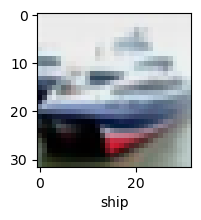

In [45]:
plot_sample(X_test, y_test, 1)

In [46]:
classes

['airplane',
 'automobile',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck']

In [48]:
classes[y_classes[1]]

'ship'

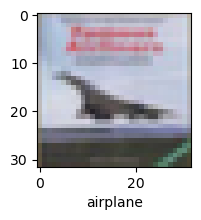

In [49]:
plot_sample(X_test, y_test, 3)

In [50]:
classes[y_classes[3]]

'airplane'

In [51]:
print("Classification Report: \n" , classification_report(y_test, y_classes))

Classification Report: 
               precision    recall  f1-score   support

           0       0.69      0.78      0.73      1000
           1       0.75      0.86      0.80      1000
           2       0.58      0.61      0.59      1000
           3       0.55      0.46      0.50      1000
           4       0.74      0.60      0.66      1000
           5       0.60      0.58      0.59      1000
           6       0.69      0.82      0.75      1000
           7       0.78      0.72      0.75      1000
           8       0.79      0.82      0.81      1000
           9       0.79      0.72      0.75      1000

    accuracy                           0.70     10000
   macro avg       0.70      0.70      0.69     10000
weighted avg       0.70      0.70      0.69     10000

